In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
!ls "/content/gdrive/My Drive/ml-100k/ml-100k"

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [20]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [23]:
train = pd.read_csv("/content/gdrive/My Drive/ml-100k/ml-100k/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/My Drive/ml-100k/ml-100k/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])


In [24]:
train

,user,movie,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
90565,943,1047,2,875502146
90566,943,1074,4,888640250
90567,943,1188,3,888640250
90568,943,1228,3,888640275


In [25]:
test

,user,movie,rating,timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201
...,...,...,...,...
9425,943,232,4,888639867
9426,943,356,4,888639598
9427,943,570,1,888640125
9428,943,808,4,888639868


In [39]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [32]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr= 0.1)
for epoch in range(1000):
 hypothesis = torch. sum(P[items] * Q[users], dim= 1)
 cost = F.mse_loss(hypothesis ,ratings)
 optimizer.zero_grad()
 cost.backward()
 optimizer.step()
 if epoch % 100 == 0:
  print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))



epoch: 0, cost: 23.929214
epoch: 100, cost: 0.574585
epoch: 200, cost: 0.499066
epoch: 300, cost: 0.472866
epoch: 400, cost: 0.461319
epoch: 500, cost: 0.455367
epoch: 600, cost: 0.451689
epoch: 700, cost: 0.449248
epoch: 800, cost: 0.447498
epoch: 900, cost: 0.446179


In [36]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
X=[]
Y = []


optimizer = torch.optim.Adam([P, Q], lr= 0.1)
for epoch in range(1000):
 hypothesis = torch. sum(P[items] * Q[users], dim= 1)
 cost = F.mse_loss(hypothesis ,ratings)
 optimizer.zero_grad()
 cost.backward()
 optimizer.step()
 X.append(epoch)
 Y.append(cost)
 if epoch % 100 == 0:
  print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))



epoch: 0, cost: 24.024334
epoch: 100, cost: 0.567604
epoch: 200, cost: 0.493679
epoch: 300, cost: 0.469957
epoch: 400, cost: 0.459174
epoch: 500, cost: 0.452863
epoch: 600, cost: 0.448752
epoch: 700, cost: 0.445768
epoch: 800, cost: 0.443429
epoch: 900, cost: 0.441622


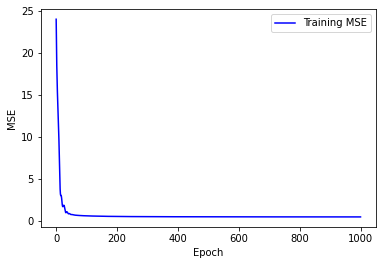

In [37]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.legend()
plt.show()

In [52]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
X=[]
Y = []
Y_test =[]


optimizer = torch.optim.Adam([P, Q], lr= 0.1)
for epoch in range(1000):
 hypothesis = torch. sum(P[items] * Q[users], dim= 1)
 cost = F.mse_loss(hypothesis ,ratings)
 optimizer.zero_grad()
 cost.backward()
 optimizer.step()
 X.append(epoch)
 Y.append(cost)
 with torch.no_grad():
   hypo_test = torch.sum(P[items_test] * Q[users_test],dim=1)
   cost_test = F.mse_loss(hypo_test,ratings_test)
   Y_test.append(cost_test)
 if epoch % 100 == 0:
  print(f"epoch:{epoch},mse:{cost},mse_test:{cost_test}")

epoch:0,mse:23.21988868713379,mse_test:22.10811996459961
epoch:100,mse:0.5796549320220947,mse_test:1.5414245128631592
epoch:200,mse:0.5028509497642517,mse_test:1.8913569450378418
epoch:300,mse:0.4761028587818146,mse_test:2.2968249320983887
epoch:400,mse:0.4639131724834442,mse_test:2.754615306854248
epoch:500,mse:0.45742425322532654,mse_test:3.2382240295410156
epoch:600,mse:0.4530736207962036,mse_test:3.749765157699585
epoch:700,mse:0.4499237537384033,mse_test:4.265904903411865
epoch:800,mse:0.44760701060295105,mse_test:4.7755560874938965
epoch:900,mse:0.44571229815483093,mse_test:5.235766887664795


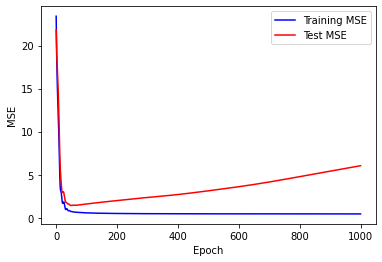

In [43]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()


In [51]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
X=[]
Y = []
Y_test =[]
lambda1 = 0.0001
lambda2 = 0.0001


optimizer = torch.optim.Adam([P, Q], lr= 0.1)
for epoch in range(1000):
 hypothesis = torch. sum(P[items] * Q[users], dim= 1)
 cost = F.mse_loss(hypothesis ,ratings)
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()
 X.append(epoch)
 Y.append(cost)
 with torch.no_grad():
   hypo_test = torch.sum(P[items_test] * Q[users_test],dim=1)
   cost_test = F.mse_loss(hypo_test,ratings_test)
   Y_test.append(cost_test)
 if epoch % 100 == 0:
  print(f"epoch:{epoch},mse:{cost},mse_test:{cost_test}")

epoch:0,mse:23.51847267150879,mse_test:21.38846778869629
epoch:100,mse:0.7037517428398132,mse_test:1.0677088499069214
epoch:200,mse:0.6438550353050232,mse_test:1.0680146217346191
epoch:300,mse:0.6321430206298828,mse_test:1.0610679388046265
epoch:400,mse:0.6289618611335754,mse_test:1.059865951538086
epoch:500,mse:0.6281816959381104,mse_test:1.0601511001586914
epoch:600,mse:0.6278262138366699,mse_test:1.0602952241897583
epoch:700,mse:0.6275820136070251,mse_test:1.0602645874023438
epoch:800,mse:0.627376914024353,mse_test:1.0600662231445312
epoch:900,mse:0.6271514892578125,mse_test:1.0596189498901367


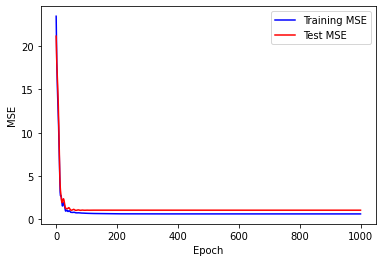

In [46]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

In [63]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()
optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)


X=[]
Y = []
Y_test =[]
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 = 0.0001




for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis ,ratings)
  
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test],dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test,ratings_test)

    X.append(epoch)
    Y.append(cost)
    Y_test.append(cost_test)
  if epoch % 100 == 0:
    print(f"epoch:{epoch},mse:{cost},mse_test:{cost_test}")

epoch:0,mse:13.3927001953125,mse_test:10.642999649047852
epoch:100,mse:0.6083654761314392,mse_test:0.8772228956222534
epoch:200,mse:0.5794980525970459,mse_test:0.8726239204406738
epoch:300,mse:0.5754681825637817,mse_test:0.8722958564758301
epoch:400,mse:0.573944628238678,mse_test:0.8720537424087524
epoch:500,mse:0.5733822584152222,mse_test:0.8723122477531433
epoch:600,mse:0.5731312036514282,mse_test:0.872286319732666
epoch:700,mse:0.5729517936706543,mse_test:0.8720711469650269
epoch:800,mse:0.5727929472923279,mse_test:0.8719200491905212
epoch:900,mse:0.5726902484893799,mse_test:0.8717596530914307


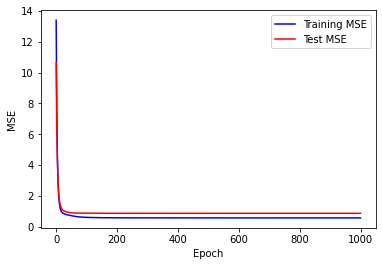

In [64]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()